### 499. Introdução ao DBSCAN
<p>Tema central: Algoritmo de agrupamento DBSCAN</p><ul><li><p>Características principais:</p><ul><li>Requer dados numéricos contínuos na mesma escala</li><li>Requer dois parâmetros obrigatórios:<ul><li>EPS: distância máxima para considerar vizinhos</li><li>Quantidade mínima de amostras</li></ul></li><li>Vantagens:<ul><li>Não precisa especificar número de clusters</li><li>Identifica clusters de formatos variados</li><li>Robusto a outliers</li></ul></li><li>Desvantagem:<ul><li>Perde eficiência se densidade variar muito entre clusters</li></ul></li></ul></li><li><p>Funcionamento:</p><ul><li><p>Core point: ponto que tem pelo menos a quantidade mínima de vizinhos dentro do raio EPS</p></li><li><p>Border point: ponto que não é core point, mas está próximo a um</p></li><li><p>Noise point: ponto que não pertence a nenhum cluster</p></li><li><p>Processo:</p><ol><li>Escolhe um core point aleatório</li><li>Adiciona seus vizinhos que são core points ao cluster</li><li>Repete com cada novo core point adicionado, até não encontrar mais vizinhos core points</li><li>Classifica border points no cluster mais próximo</li><li>Repete processo para encontrar novos clusters, começando de outros core points não visitados</li><li>Pontos não classificados em nenhum cluster são noise points</li></ol></li></ul></li><li><p>Parâmetros influenciam muito a qualidade do agrupamento</p></li><li><p>Funciona melhor quando classes são densas e separadas por regiões de baixa densidade</p></li></ul>

### 500. DBSCAN na prática
<p>Tema central: Utilização do algoritmo DBSCAN para clusterização no Scikit-Learn</p><ul><li><p>DBSCAN</p><ul><li>Parâmetros obrigatórios:<ul><li>EPS (raio): define a vizinhança ao redor de cada ponto</li><li>MinSamples: número mínimo de pontos dentro de uma vizinhança para formar um cluster</li></ul></li><li>Influenciam bastante os resultados</li><li>Valores default podem não ser adequados</li><li>Pode utilizar classe DBSCAN ou função dbscan</li><li>Retorna rótulos dos clusters (-1 = outliers)</li></ul></li><li><p>Tunando parâmetros</p><ul><li>Pode utilizar interatividade com widget Interact</li><li>Também pode calcular EPS ideal com distâncias dos vizinhos mais próximos</li><li>Para muitas variáveis:<ul><li>Fazer PCA e tunar</li><li>Testar combinações de parâmetros e escolher a de maior silhouette</li></ul></li></ul></li><li><p>Dificuldades</p><ul><li>Sensível a diferenças de densidade</li><li>Difícil tunar parâmetros</li><li>Bom para clusters de formas irregulares</li></ul></li><li><p>Próximo algoritmo</p><ul><li>Também baseado em densidade</li><li>Função do Scikit-Learn ajuda a encontrar parâmetro obrigatório</li></ul></li></ul>

In [2]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [5]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [6]:
# Simulated Data
# Simulate Clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


In [7]:
# Train DBSCAN
model=DBSCAN()
labels = model.fit_predict(X)

In [8]:
# Train DBSCAN(function)
labels=dbscan(X)[1]

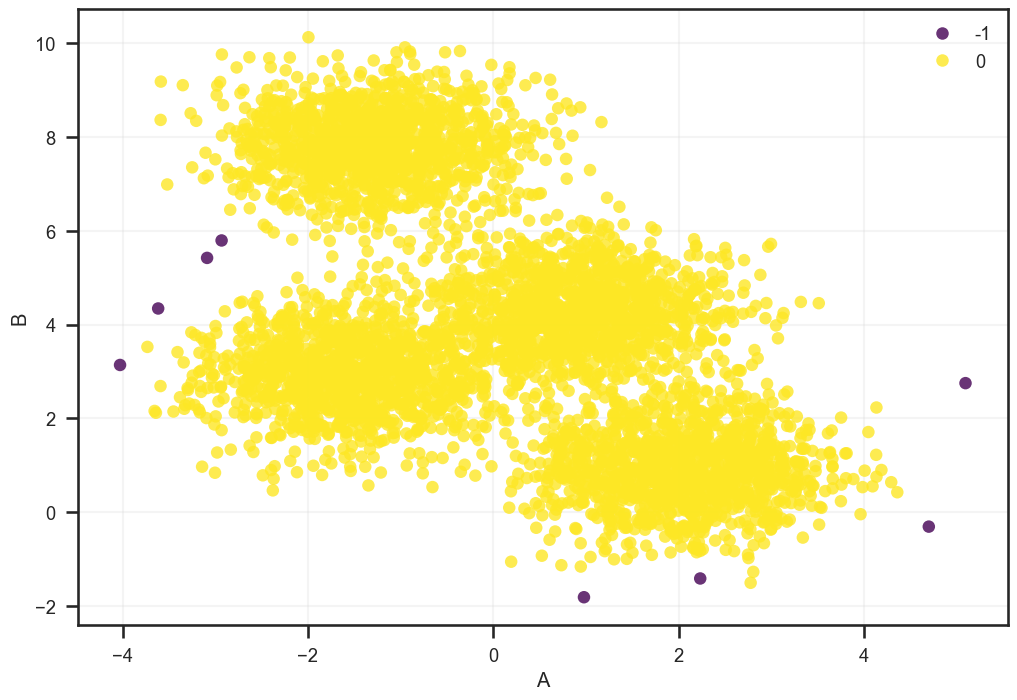

In [9]:
# Visualize output
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [12]:
# _ sempre que tem valores que não interessa 
@interact(eps=(0.01,1, 0.01), min_samples=(1,20))
def custom_dbscan(eps,min_samples):
    _,labels = dbscan(X, eps=eps, min_samples=min_samples)
    sns.scatterplot(data=df, x='A', y='B', hue=labels, palette='tab10')
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.01, step=0.01), IntSlider(value…

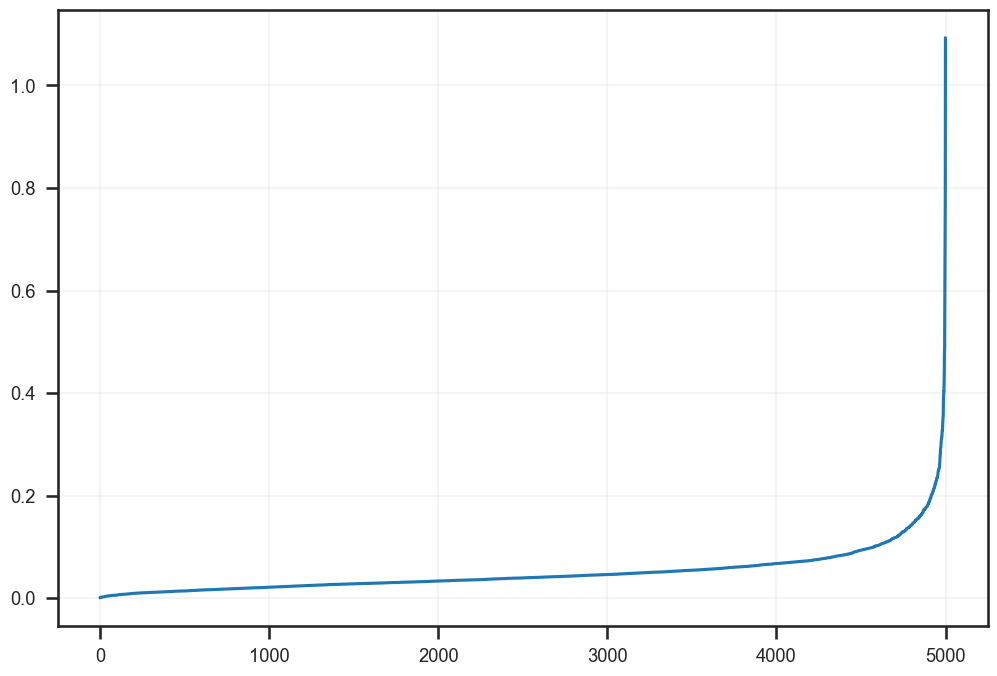

In [11]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nn_model.kneighbors(X)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()